In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('bikeshare2017.csv')

In [3]:
df.dtypes

Bike ID                    float64
Birth Year                 float64
End Station ID             float64
End Station Latitude       float64
End Station Longitude      float64
End Station Name            object
Gender                     float64
Start Station ID           float64
Start Station Latitude     float64
Start Station Longitude    float64
Start Station Name          object
Start Time                  object
Stop Time                   object
Trip Duration              float64
User Type                   object
dtype: object

In [4]:
#Looking at trips that were longer than a week in 2017:
df[df['Trip Duration'] > 604800]['Start Station Name'].value_counts()

Fulton St & Utica Ave                 51
Humboldt St & Varet St                27
Lewis Ave & Madison St                25
Kingston Ave & Herkimer St            24
Lewis Ave & Kosciuszko St             24
Halsey St & Tompkins Ave              20
Macon St & Nostrand Ave               18
Myrtle Ave & Lewis Ave                16
Verona Pl & Fulton St                 15
Albany Ave & Fulton St                15
S 4 St & Rodney St                    13
Pulaski St & Marcus Garvey Blvd       13
Atlantic Ave & Fort Greene Pl         12
Grand Army Plaza & Plaza St West      12
Marcus Garvey Blvd & Macon St         11
Broadway & Whipple St                 11
Plaza St West & Flatbush Ave          10
Putnam Ave & Throop Ave                9
Brooklyn Bridge Park - Pier 2          9
Lawrence St & Willoughby St            8
Stagg St & Union Ave                   8
Greene Ave & Throop Ave                8
Putnam Ave & Nostrand Ave              7
S 5 Pl & S 4 St                        7
Fulton St & Adam

In [5]:
#Quite a few are recovered and checked in at the Depots.
df[df['Trip Duration'] > 604800]['End Station Name'].value_counts()

NYCBS Depot - GOW                   254
NYCBS DEPOT - DELANCEY              107
NYCBS Depot - PIT                    62
Fulton St & Utica Ave                24
NYCBS Depot - SSP                    24
E 97 St & Madison Ave                14
Lewis Ave & Kosciuszko St            13
Myrtle Ave & Lewis Ave               12
Humboldt St & Varet St                9
31 St & Broadway                      8
Kingston Ave & Herkimer St            7
Pulaski St & Marcus Garvey Blvd       6
Tompkins Ave & Hopkins St             6
Carlton Ave & Park Ave                6
Lewis Ave & Madison St                6
Myrtle Ave & Marcy Ave                6
Halsey St & Tompkins Ave              6
West Drive & Prospect Park West       5
Grand Army Plaza & Plaza St West      5
Broadway & Whipple St                 5
Park Ave & Marcus Garvey Blvd         5
Hancock St & Bedford Ave              5
Throop Ave & Myrtle Ave               5
Graham Ave & Conselyea St             4
1 Ave & E 16 St                       4


In [6]:
#let's also explore the age groups.
df['Birth Year'].value_counts()

1989.0    637995
1988.0    633159
1990.0    622527
1986.0    612018
1987.0    610337
1985.0    606735
1991.0    570175
1984.0    561343
1983.0    524858
1992.0    514374
1982.0    488489
1981.0    454627
1993.0    420400
1980.0    415692
1979.0    385603
1978.0    355898
1977.0    333570
1976.0    328303
1970.0    316266
1974.0    304797
1975.0    302246
1971.0    293325
1969.0    286184
1973.0    280427
1972.0    279730
1994.0    272759
1968.0    259272
1967.0    237467
1965.0    229773
1964.0    225373
           ...  
1933.0       385
1899.0       346
1910.0       337
1912.0       262
1917.0       254
1887.0       246
1926.0       233
1893.0       196
1929.0       185
1918.0       162
1921.0       146
1894.0       128
1886.0       125
1927.0       121
1895.0        89
1930.0        78
1928.0        69
1888.0        54
1907.0        44
1913.0        39
1915.0        32
1916.0        31
1896.0        23
1920.0        11
1889.0        10
1890.0         9
1874.0         6
1905.0        

In [7]:
#HT to whoever has 1858 on their citibike account.
df.head()

,Bike ID,Birth Year,End Station ID,End Station Latitude,End Station Longitude,End Station Name,Gender,Start Station ID,Start Station Latitude,Start Station Longitude,Start Station Name,Start Time,Stop Time,Trip Duration,User Type
0,25542.0,1965.0,3165.0,40.775794,-73.976206,Central Park West & W 72 St,2.0,3226.0,40.782750,-73.971370,W 82 St & Central Park West,2017-01-01 00:00:21,2017-01-01 00:11:41,680.0,Subscriber
1,21136.0,1987.0,498.0,40.748549,-73.988084,Broadway & W 32 St,2.0,3263.0,40.729236,-73.990868,Cooper Square & E 7 St,2017-01-01 00:00:45,2017-01-01 00:22:08,1282.0,Subscriber
2,18147.0,NaN,3152.0,40.768737,-73.961199,3 Ave & E 71 St,0.0,3143.0,40.776829,-73.963888,5 Ave & E 78 St,2017-01-01 00:00:57,2017-01-01 00:11:46,648.0,Customer
3,21211.0,NaN,3152.0,40.768737,-73.961199,3 Ave & E 71 St,0.0,3143.0,40.776829,-73.963888,5 Ave & E 78 St,2017-01-01 00:01:10,2017-01-01 00:11:42,631.0,Customer
4,26819.0,NaN,3152.0,40.768737,-73.961199,3 Ave & E 71 St,0.0,3143.0,40.776829,-73.963888,5 Ave & E 78 St,2017-01-01 00:01:25,2017-01-01 00:11:47,621.0,Customer


In [8]:
df.Gender.value_counts()

1.0    11167755
2.0     3776282
0.0     1715548
Name: Gender, dtype: int64

In [9]:
df.groupby('Gender')['Trip Duration'].mean()

Gender
0.0    1890.959271
1.0     848.380538
2.0     999.838675
Name: Trip Duration, dtype: float64

In [10]:
#Huh, why is the 0 (Unknown) so much higher?
df.groupby('User Type')['Trip Duration'].mean()


User Type
Customer      2513.203902
Subscriber     806.533014
Name: Trip Duration, dtype: float64

In [11]:
#So here we compare the genders and if the ride was done by a subscriber or customer.
df.groupby(['User Type', 'Gender'])['Trip Duration'].mean()

User Type   Gender
Customer    0.0       2049.758730
            1.0       5018.476244
            2.0       4212.791753
Subscriber  0.0        915.791964
            1.0        774.044324
            2.0        896.806349
Name: Trip Duration, dtype: float64

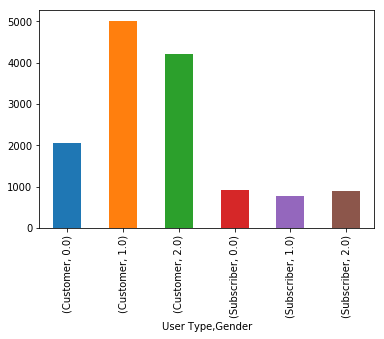

In [12]:
df.groupby(['User Type', 'Gender'])['Trip Duration'].mean().plot(kind='bar')

In [13]:
df['Start Station Name'].value_counts().head() #Most popular places to start

Pershing Square North    162716
E 17 St & Broadway       112218
Broadway & E 22 St       108590
W 21 St & 6 Ave          107133
West St & Chambers St    105610
Name: Start Station Name, dtype: int64

In [14]:
df['End Station Name'].value_counts().head() #Most popular places to end

Pershing Square North    160387
E 17 St & Broadway       117318
Broadway & E 22 St       116509
West St & Chambers St    114518
W 21 St & 6 Ave          108458
Name: End Station Name, dtype: int64

In [15]:
#And, maybe the story here is about a bike and not people. What is the most popular citibike in NYC,
#and where have they been?
df['Bike ID'].value_counts().head()

25738.0    2514
25275.0    2409
27161.0    2376
26565.0    2370
27111.0    2349
Name: Bike ID, dtype: int64

In [16]:
#Why hello bike 25738.0. Let's find out more about you.
df[df['Bike ID'] == 25738.0]

,Bike ID,Birth Year,End Station ID,End Station Latitude,End Station Longitude,End Station Name,Gender,Start Station ID,Start Station Latitude,Start Station Longitude,Start Station Name,Start Time,Stop Time,Trip Duration,User Type
1001,25738.0,1985.0,3148.0,40.775655,-73.950686,E 84 St & 1 Ave,1.0,3140.0,40.771404,-73.953517,1 Ave & E 78 St,2017-01-01 03:04:00,2017-01-01 03:06:43,163.0,Subscriber
1907,25738.0,1952.0,3150.0,40.775369,-73.948034,E 85 St & York Ave,1.0,3148.0,40.775655,-73.950686,E 84 St & 1 Ave,2017-01-01 09:19:49,2017-01-01 09:26:46,416.0,Subscriber
2634,25738.0,1962.0,520.0,40.759923,-73.976485,W 52 St & 5 Ave,2.0,3150.0,40.775369,-73.948034,E 85 St & York Ave,2017-01-01 10:42:20,2017-01-01 11:04:05,1304.0,Subscriber
4508,25738.0,1962.0,3142.0,40.761227,-73.960940,1 Ave & E 62 St,2.0,520.0,40.759923,-73.976485,W 52 St & 5 Ave,2017-01-01 12:35:28,2017-01-01 12:44:34,545.0,Subscriber
5813,25738.0,1962.0,3150.0,40.775369,-73.948034,E 85 St & York Ave,2.0,3142.0,40.761227,-73.960940,1 Ave & E 62 St,2017-01-01 13:31:16,2017-01-01 13:42:34,677.0,Subscriber
8007,25738.0,1990.0,3147.0,40.778012,-73.954071,E 85 St & 3 Ave,1.0,3150.0,40.775369,-73.948034,E 85 St & York Ave,2017-01-01 14:49:19,2017-01-01 14:52:12,172.0,Subscriber
10996,25738.0,1983.0,3282.0,40.783070,-73.959390,5 Ave & E 88 St,1.0,3147.0,40.778012,-73.954071,E 85 St & 3 Ave,2017-01-01 16:36:02,2017-01-01 16:43:12,429.0,Subscriber
12566,25738.0,1986.0,499.0,40.769155,-73.981918,Broadway & W 60 St,2.0,3282.0,40.783070,-73.959390,5 Ave & E 88 St,2017-01-01 17:55:17,2017-01-01 18:11:38,980.0,NaN
13732,25738.0,1986.0,3307.0,40.794165,-73.974124,West End Ave & W 94 St,2.0,499.0,40.769155,-73.981918,Broadway & W 60 St,2017-01-01 19:14:53,2017-01-01 19:37:30,1356.0,Subscriber
19931,25738.0,1990.0,3177.0,40.786795,-73.977112,W 84 St & Broadway,1.0,3307.0,40.794165,-73.974124,West End Ave & W 94 St,2017-01-02 12:48:15,2017-01-02 15:35:37,10042.0,Subscriber


In [17]:
#What's the longest trip you've been on?
df[df['Bike ID'] == 25738.0].sort_values('Trip Duration', ascending=False)

,Bike ID,Birth Year,End Station ID,End Station Latitude,End Station Longitude,End Station Name,Gender,Start Station ID,Start Station Latitude,Start Station Longitude,Start Station Name,Start Time,Stop Time,Trip Duration,User Type
9096503,25738.0,1970.0,317.0,40.724537,-73.981854,E 6 St & Avenue B,1.0,236.0,40.728419,-73.987140,St Marks Pl & 2 Ave,2017-08-10 13:41:09,2017-08-13 18:05:34,275064.0,Subscriber
14014182,25738.0,1970.0,312.0,40.722055,-73.989111,Allen St & Stanton St,1.0,356.0,40.716226,-73.982612,Bialystoker Pl & Delancey St,2017-10-28 18:26:17,2017-10-29 10:28:46,57749.0,Subscriber
7494877,25738.0,NaN,439.0,40.726281,-73.989780,E 4 St & 2 Ave,0.0,486.0,40.746201,-73.988557,Broadway & W 29 St,2017-07-13 17:29:29,2017-07-14 09:13:03,56613.0,Customer
8452496,25738.0,NaN,3063.0,40.695270,-73.952381,Nostrand Ave & Myrtle Ave,0.0,144.0,40.698399,-73.980689,Nassau St & Navy St,2017-07-30 14:18:30,2017-07-30 17:57:11,13121.0,Customer
5236965,25738.0,NaN,304.0,40.704633,-74.013617,Broadway & Battery Pl,0.0,540.0,40.743116,-73.982154,Lexington Ave & E 29 St,2017-06-03 13:10:16,2017-06-03 16:22:15,11519.0,Customer
19931,25738.0,1990.0,3177.0,40.786795,-73.977112,W 84 St & Broadway,1.0,3307.0,40.794165,-73.974124,West End Ave & W 94 St,2017-01-02 12:48:15,2017-01-02 15:35:37,10042.0,Subscriber
6689146,25738.0,1984.0,417.0,40.712912,-74.010202,Barclay St & Church St,2.0,490.0,40.751551,-73.993934,8 Ave & W 33 St,2017-06-28 21:27:34,2017-06-28 23:50:44,8589.0,Customer
1742252,25738.0,1967.0,3255.0,40.750585,-73.994685,8 Ave & W 31 St,2.0,238.0,40.736197,-74.008592,Bank St & Washington St,2017-03-08 15:37:16,2017-03-08 17:28:57,6700.0,Subscriber
13406171,25738.0,NaN,281.0,40.764397,-73.973715,Grand Army Plaza & Central Park S,0.0,2006.0,40.765909,-73.976342,Central Park S & 6 Ave,2017-10-19 15:23:39,2017-10-19 17:15:04,6684.0,Customer
4585700,25738.0,1997.0,3163.0,40.773407,-73.977825,Central Park West & W 68 St,1.0,167.0,40.748901,-73.976049,E 39 St & 3 Ave,2017-05-21 05:42:31,2017-05-21 07:26:02,6210.0,Customer


## Round 2, let's add some datetime

In [18]:
df.dtypes

Bike ID                    float64
Birth Year                 float64
End Station ID             float64
End Station Latitude       float64
End Station Longitude      float64
End Station Name            object
Gender                     float64
Start Station ID           float64
Start Station Latitude     float64
Start Station Longitude    float64
Start Station Name          object
Start Time                  object
Stop Time                   object
Trip Duration              float64
User Type                   object
dtype: object

In [19]:
df.tail()

,Bike ID,Birth Year,End Station ID,End Station Latitude,End Station Longitude,End Station Name,Gender,Start Station ID,Start Station Latitude,Start Station Longitude,Start Station Name,Start Time,Stop Time,Trip Duration,User Type
16659580,29644.0,1987.0,3186.0,40.719586,-74.043117,Grove St PATH,2.0,3191.0,40.718211,-74.083639,Union St,2017-12-31 21:54:12,2017-12-31 22:10:25,972.0,Subscriber
16659581,31799.0,1994.0,3268.0,40.713464,-74.062859,Lafayette Park,1.0,3280.0,40.719282,-74.071262,Astor Place,2017-12-31 22:10:18,2017-12-31 22:16:41,382.0,Subscriber
16659582,31920.0,1957.0,3185.0,40.717732,-74.043845,City Hall,1.0,3186.0,40.719586,-74.043117,Grove St PATH,2017-12-31 22:55:10,2017-12-31 22:56:43,93.0,Subscriber
16659583,31925.0,1964.0,3211.0,40.721525,-74.046305,Newark Ave,1.0,3270.0,40.725289,-74.045572,Jersey & 6th St,2017-12-31 23:20:54,2017-12-31 23:24:00,186.0,Subscriber
16659584,31709.0,1979.0,3280.0,40.719282,-74.071262,Astor Place,1.0,3195.0,40.730743,-74.063784,Sip Ave,2017-12-31 23:33:55,2017-12-31 23:40:57,422.0,Subscriber


In [20]:
df['Start Time'] = pd.to_datetime(df['Start Time'])

In [21]:
df['Stop Time'] = pd.to_datetime(df['Stop Time'])

In [22]:
df.dtypes

Bike ID                           float64
Birth Year                        float64
End Station ID                    float64
End Station Latitude              float64
End Station Longitude             float64
End Station Name                   object
Gender                            float64
Start Station ID                  float64
Start Station Latitude            float64
Start Station Longitude           float64
Start Station Name                 object
Start Time                 datetime64[ns]
Stop Time                  datetime64[ns]
Trip Duration                     float64
User Type                          object
dtype: object

In [23]:
# Let's save that
df.to_csv('bikeshare2017_cleaned.csv', index=False)

In [24]:
df[df['Bike ID'] == 25738.0].shape

(2514, 15)

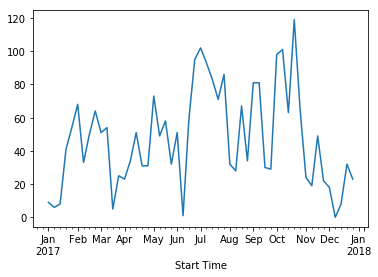

In [41]:
df[df['Bike ID'] == 25738.0].resample('W', on='Start Time')['Start Time'].count().plot()

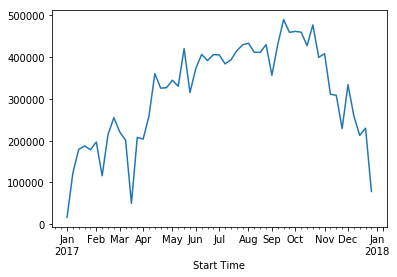

In [42]:
df.resample('W', on='Start Time')['Start Time'].count().plot()

In [49]:
df[df['Bike ID'] == 25738.0].groupby('Gender')['User Type'].value_counts()

Gender  User Type 
0.0     Customer       197
        Subscriber      36
1.0     Subscriber    1754
        Customer        21
2.0     Subscriber     495
        Customer         8
Name: User Type, dtype: int64

In [50]:
df[df['Bike ID'] == 25738.0].Gender.value_counts()

1.0    1777
2.0     504
0.0     233
Name: Gender, dtype: int64

In [56]:
df[df['Bike ID'] == 25738.0]['Birth Year'].value_counts()

1988.0    101
1990.0     96
1986.0     96
1989.0     90
1991.0     89
1984.0     87
1987.0     87
1985.0     83
1992.0     81
1982.0     80
1983.0     73
1980.0     63
1993.0     59
1981.0     58
1971.0     56
1979.0     56
1969.0     55
1978.0     54
1976.0     52
1972.0     48
1973.0     47
1974.0     46
1968.0     45
1977.0     44
1994.0     43
1970.0     41
1975.0     40
1964.0     36
1966.0     36
1960.0     35
         ... 
1965.0     31
1959.0     29
1995.0     28
1958.0     28
1996.0     25
1955.0     23
1963.0     22
1961.0     21
1956.0     17
1997.0     16
1957.0     16
1954.0     15
1951.0     13
1952.0     12
1953.0     11
1998.0      9
1950.0      8
1944.0      3
1999.0      3
1949.0      3
1945.0      3
2000.0      2
1948.0      2
1941.0      2
1946.0      2
2001.0      1
1917.0      1
1923.0      1
1947.0      1
1938.0      1
Name: Birth Year, Length: 62, dtype: int64

In [61]:
df[df['Bike ID'] == 25738.0]['Trip Duration'].sort_values(ascending=False)

9096503     275064.0
14014182     57749.0
7494877      56613.0
8452496      13121.0
5236965      11519.0
19931        10042.0
6689146       8589.0
1742252       6700.0
13406171      6684.0
4585700       6210.0
2854643       5686.0
616058        4544.0
1496052       4489.0
4581053       4241.0
6844548       4198.0
6831177       4105.0
12462245      3723.0
13333575      3360.0
8624953       3320.0
10173189      3299.0
14389308      3269.0
12308276      3114.0
6436290       3071.0
13257817      3044.0
8134029       3042.0
6764416       3017.0
6751158       2977.0
13911247      2962.0
10540756      2948.0
7751685       2914.0
              ...   
8249220        111.0
9342428        110.0
282108         110.0
4764165        109.0
10300153       109.0
11692222       108.0
12659972       106.0
1255037        104.0
3540713        103.0
5111366        103.0
12009007       103.0
7882850         98.0
12766144        93.0
10083798        88.0
6943564         87.0
16358331        87.0
1178423      

In [62]:
df.iloc[9096503]

Bike ID                                  25738
Birth Year                                1970
End Station ID                             317
End Station Latitude                   40.7245
End Station Longitude                 -73.9819
End Station Name             E 6 St & Avenue B
Gender                                       1
Start Station ID                           236
Start Station Latitude                 40.7284
Start Station Longitude               -73.9871
Start Station Name         St Marks Pl & 2 Ave
Start Time                 2017-08-10 13:41:09
Stop Time                  2017-08-13 18:05:34
Trip Duration                           275064
User Type                           Subscriber
Name: 9096503, dtype: object

In [63]:
df.iloc[14014182]

Bike ID                                           25738
Birth Year                                         1970
End Station ID                                      312
End Station Latitude                            40.7221
End Station Longitude                          -73.9891
End Station Name                  Allen St & Stanton St
Gender                                                1
Start Station ID                                    356
Start Station Latitude                          40.7162
Start Station Longitude                        -73.9826
Start Station Name         Bialystoker Pl & Delancey St
Start Time                          2017-10-28 18:26:17
Stop Time                           2017-10-29 10:28:46
Trip Duration                                     57749
User Type                                    Subscriber
Name: 14014182, dtype: object

In [96]:
df[df['Bike ID'] == 25738.0]['Start Station Name'].value_counts()

Pershing Square North                            31
E 17 St & Broadway                               24
W 27 St & 7 Ave                                  20
Broadway & E 22 St                               20
Central Park S & 6 Ave                           19
W 21 St & 6 Ave                                  19
W 41 St & 8 Ave                                  19
Broadway & W 32 St                               18
E 11 St & 2 Ave                                  17
E 39 St & 3 Ave                                  17
E 25 St & 2 Ave                                  17
Great Jones St                                   16
W 4 St & 7 Ave S                                 15
Lexington Ave & E 24 St                          15
W 18 St & 6 Ave                                  15
E 7 St & Avenue A                                15
8 Ave & W 33 St                                  15
W 20 St & 7 Ave                                  15
6 Ave & W 33 St                                  15
W 52 St & 6 

In [66]:
df[df['Bike ID'] == 25738.0]['End Station Name'].value_counts()

Pershing Square North                            29
E 17 St & Broadway                               24
Broadway & E 22 St                               20
W 21 St & 6 Ave                                  19
W 27 St & 7 Ave                                  19
Broadway & W 32 St                               18
W 41 St & 8 Ave                                  18
Central Park S & 6 Ave                           18
E 11 St & 2 Ave                                  17
E 39 St & 3 Ave                                  17
W 52 St & 6 Ave                                  16
E 7 St & Avenue A                                16
Great Jones St                                   16
E 25 St & 2 Ave                                  16
W 4 St & 7 Ave S                                 15
W 20 St & 7 Ave                                  15
8 Ave & W 33 St                                  15
W 18 St & 6 Ave                                  15
6 Ave & W 33 St                                  15
Lexington Av

In [88]:
df[df.Gender == 2.0].groupby('Bike ID').Gender.value_counts().sort_values(ascending=False)

Bike ID  Gender
25286.0  2.0       510
24929.0  2.0       509
27235.0  2.0       505
25817.0  2.0       505
25738.0  2.0       504
26129.0  2.0       502
26931.0  2.0       500
27018.0  2.0       499
27289.0  2.0       499
26135.0  2.0       498
26716.0  2.0       495
24908.0  2.0       495
26503.0  2.0       494
26512.0  2.0       494
26928.0  2.0       494
25123.0  2.0       492
24816.0  2.0       491
25374.0  2.0       491
26492.0  2.0       491
26114.0  2.0       490
26002.0  2.0       490
25129.0  2.0       489
27111.0  2.0       487
26565.0  2.0       487
25052.0  2.0       486
25561.0  2.0       486
25612.0  2.0       485
25750.0  2.0       485
29186.0  2.0       485
25657.0  2.0       484
                  ... 
23908.0  2.0         1
23368.0  2.0         1
23585.0  2.0         1
29648.0  2.0         1
30829.0  2.0         1
26362.0  2.0         1
32872.0  2.0         1
23444.0  2.0         1
30157.0  2.0         1
22781.0  2.0         1
27342.0  2.0         1
23319.0  2.0      

In [91]:
df[df['Bike ID'] == 25286.0].Gender.value_counts()

1.0    1490
2.0     510
0.0     191
Name: Gender, dtype: int64

In [92]:
df[df['Bike ID'] == 25738.0].Gender.value_counts()

1.0    1777
2.0     504
0.0     233
Name: Gender, dtype: int64

In [95]:
df[df['Bike ID'] == 25738.0].describe()

,Bike ID,Birth Year,End Station ID,End Station Latitude,End Station Longitude,Gender,Start Station ID,Start Station Latitude,Start Station Longitude,Trip Duration
count,2514.0,2295.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000
mean,25738.0,1978.643137,1284.864757,40.739572,-73.984602,1.107796,1286.819014,40.739783,-73.984448,977.821002
std,0.0,11.937624,1318.227394,0.026407,0.016430,0.530707,1318.214295,0.026537,0.016381,5742.730361
min,25738.0,1917.000000,72.000000,40.655949,-74.017134,0.000000,72.000000,40.646768,-74.017134,62.000000
25%,25738.0,1970.000000,358.000000,40.722293,-73.995101,1.000000,358.000000,40.722330,-73.994903,377.250000
50%,25738.0,1982.000000,485.000000,40.740343,-73.986777,1.000000,485.000000,40.740964,-73.986724,639.000000
75%,25738.0,1988.000000,3134.000000,40.756687,-73.976206,1.000000,3134.000000,40.757148,-73.976056,1061.750000
max,25738.0,2001.000000,3643.000000,40.812056,-73.929891,2.000000,3643.000000,40.812056,-73.929891,275064.000000


In [98]:
df[df['Bike ID'] == 25738.0]['Birth Year'].describe()

count    2295.000000
mean     1978.643137
std        11.937624
min      1917.000000
25%      1970.000000
50%      1982.000000
75%      1988.000000
max      2001.000000
Name: Birth Year, dtype: float64

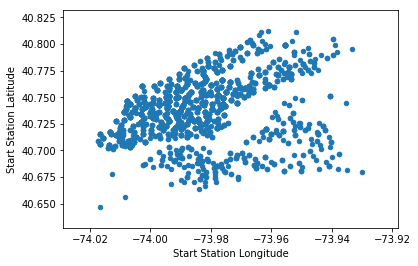

In [101]:
df[df['Bike ID'] == 25738.0].plot(kind='scatter', y='Start Station Latitude', x='Start Station Longitude')

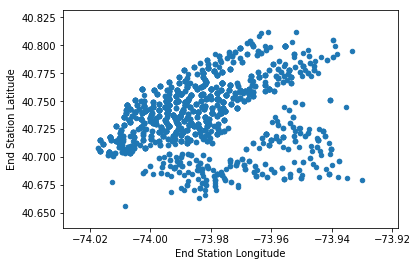

In [102]:
df[df['Bike ID'] == 25738.0].plot(kind='scatter', y='End Station Latitude', x='End Station Longitude')

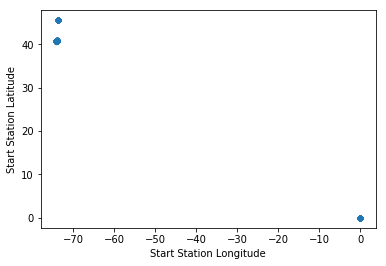

In [103]:
df.plot(kind='scatter', y='Start Station Latitude', x='Start Station Longitude')

In [104]:
df[df['Start Station Latitude']==0]

,Bike ID,Birth Year,End Station ID,End Station Latitude,End Station Longitude,End Station Name,Gender,Start Station ID,Start Station Latitude,Start Station Longitude,Start Station Name,Start Time,Stop Time,Trip Duration,User Type
692002,24956.0,1987.0,3446.0,0.000000,0.000000,NYCBS Depot - STY - Valet Scan,1.0,3446.0,0.0,0.0,NYCBS Depot - STY - Valet Scan,2017-01-30 17:36:54,2017-01-30 17:38:34,100.0,Subscriber
697103,25505.0,1992.0,3446.0,0.000000,0.000000,NYCBS Depot - STY - Valet Scan,1.0,3446.0,0.0,0.0,NYCBS Depot - STY - Valet Scan,2017-01-30 19:14:48,2017-01-30 19:19:19,271.0,Subscriber
6594132,29702.0,1969.0,523.0,40.754666,-73.991382,W 38 St & 8 Ave,1.0,3248.0,0.0,0.0,LPI Facility,2017-06-27 15:18:32,2017-06-27 15:30:57,745.0,Subscriber
6594603,16115.0,1964.0,446.0,40.744876,-73.995299,W 24 St & 7 Ave,1.0,3248.0,0.0,0.0,LPI Facility,2017-06-27 16:05:10,2017-06-27 16:16:34,684.0,Subscriber
11163419,29105.0,1980.0,3633.0,0.000000,0.000000,333 Johnson TEST 1,2.0,3633.0,0.0,0.0,333 Johnson TEST 1,2017-09-14 14:10:23,2017-09-15 10:07:03,71800.0,Subscriber
12247041,26202.0,1991.0,3201.0,40.737711,-74.066921,Dey St,2.0,3215.0,0.0,0.0,JSQ Don't Use,2017-10-01 00:50:00,2017-10-01 00:56:31,391.0,Subscriber
12247042,31938.0,1990.0,3201.0,40.737711,-74.066921,Dey St,1.0,3215.0,0.0,0.0,JSQ Don't Use,2017-10-01 00:50:02,2017-10-01 00:56:31,389.0,Subscriber
12247049,29644.0,1964.0,3211.0,40.721525,-74.046305,Newark Ave,1.0,3480.0,0.0,0.0,WS Don't Use,2017-10-01 00:50:30,2017-10-01 00:56:23,353.0,Subscriber
12248105,26242.0,1978.0,3281.0,40.745910,-74.057271,Leonard Gordon Park,1.0,3215.0,0.0,0.0,JSQ Don't Use,2017-10-01 03:41:27,2017-10-01 03:47:44,376.0,Subscriber
12249602,31722.0,1989.0,3202.0,40.727224,-74.033759,Newport PATH,1.0,3480.0,0.0,0.0,WS Don't Use,2017-10-01 08:16:11,2017-10-01 08:18:15,123.0,Customer


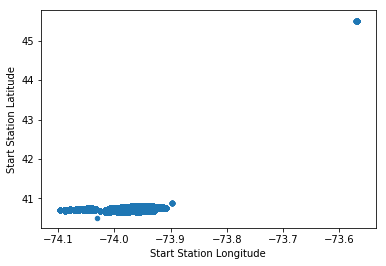

In [105]:
df[df['Start Station Latitude']!=0].plot(kind='scatter', y='Start Station Latitude', x='Start Station Longitude')

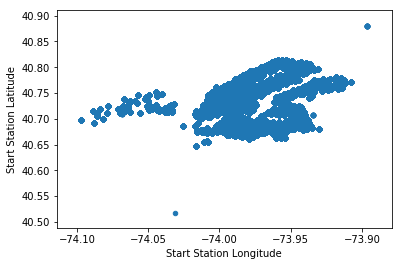

In [108]:
df[(df['Start Station Latitude']!=0) & (df['Start Station Latitude']<=44)].plot(kind='scatter', y='Start Station Latitude', x='Start Station Longitude')

In [109]:
df[df['Bike ID'] == 25738.0]

,Bike ID,Birth Year,End Station ID,End Station Latitude,End Station Longitude,End Station Name,Gender,Start Station ID,Start Station Latitude,Start Station Longitude,Start Station Name,Start Time,Stop Time,Trip Duration,User Type
1001,25738.0,1985.0,3148.0,40.775655,-73.950686,E 84 St & 1 Ave,1.0,3140.0,40.771404,-73.953517,1 Ave & E 78 St,2017-01-01 03:04:00,2017-01-01 03:06:43,163.0,Subscriber
1907,25738.0,1952.0,3150.0,40.775369,-73.948034,E 85 St & York Ave,1.0,3148.0,40.775655,-73.950686,E 84 St & 1 Ave,2017-01-01 09:19:49,2017-01-01 09:26:46,416.0,Subscriber
2634,25738.0,1962.0,520.0,40.759923,-73.976485,W 52 St & 5 Ave,2.0,3150.0,40.775369,-73.948034,E 85 St & York Ave,2017-01-01 10:42:20,2017-01-01 11:04:05,1304.0,Subscriber
4508,25738.0,1962.0,3142.0,40.761227,-73.960940,1 Ave & E 62 St,2.0,520.0,40.759923,-73.976485,W 52 St & 5 Ave,2017-01-01 12:35:28,2017-01-01 12:44:34,545.0,Subscriber
5813,25738.0,1962.0,3150.0,40.775369,-73.948034,E 85 St & York Ave,2.0,3142.0,40.761227,-73.960940,1 Ave & E 62 St,2017-01-01 13:31:16,2017-01-01 13:42:34,677.0,Subscriber
8007,25738.0,1990.0,3147.0,40.778012,-73.954071,E 85 St & 3 Ave,1.0,3150.0,40.775369,-73.948034,E 85 St & York Ave,2017-01-01 14:49:19,2017-01-01 14:52:12,172.0,Subscriber
10996,25738.0,1983.0,3282.0,40.783070,-73.959390,5 Ave & E 88 St,1.0,3147.0,40.778012,-73.954071,E 85 St & 3 Ave,2017-01-01 16:36:02,2017-01-01 16:43:12,429.0,Subscriber
12566,25738.0,1986.0,499.0,40.769155,-73.981918,Broadway & W 60 St,2.0,3282.0,40.783070,-73.959390,5 Ave & E 88 St,2017-01-01 17:55:17,2017-01-01 18:11:38,980.0,NaN
13732,25738.0,1986.0,3307.0,40.794165,-73.974124,West End Ave & W 94 St,2.0,499.0,40.769155,-73.981918,Broadway & W 60 St,2017-01-01 19:14:53,2017-01-01 19:37:30,1356.0,Subscriber
19931,25738.0,1990.0,3177.0,40.786795,-73.977112,W 84 St & Broadway,1.0,3307.0,40.794165,-73.974124,West End Ave & W 94 St,2017-01-02 12:48:15,2017-01-02 15:35:37,10042.0,Subscriber


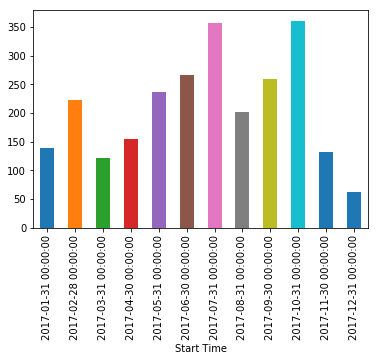

In [112]:
df[df['Bike ID'] == 25738.0].resample('M', on='Start Time')['Start Time'].count().plot(kind='bar')

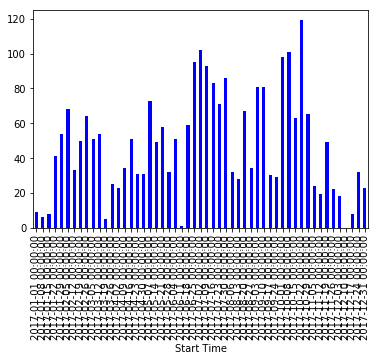

In [115]:
df[df['Bike ID'] == 25738.0].resample('W', on='Start Time')['Start Time'].count().plot(kind='bar', color='blue')

Now we are getting somewhere. Looks like there were some weeks that saw very little use. Let's explore the three lowest.

In [117]:
df[df['Bike ID'] == 25738.0].resample('W', on='Start Time')['Start Time'].count()

Start Time
2017-01-01      9
2017-01-08      6
2017-01-15      8
2017-01-22     41
2017-01-29     54
2017-02-05     68
2017-02-12     33
2017-02-19     50
2017-02-26     64
2017-03-05     51
2017-03-12     54
2017-03-19      5
2017-03-26     25
2017-04-02     23
2017-04-09     34
2017-04-16     51
2017-04-23     31
2017-04-30     31
2017-05-07     73
2017-05-14     49
2017-05-21     58
2017-05-28     32
2017-06-04     51
2017-06-11      1
2017-06-18     59
2017-06-25     95
2017-07-02    102
2017-07-09     93
2017-07-16     83
2017-07-23     71
2017-07-30     86
2017-08-06     32
2017-08-13     28
2017-08-20     67
2017-08-27     34
2017-09-03     81
2017-09-10     81
2017-09-17     30
2017-09-24     29
2017-10-01     98
2017-10-08    101
2017-10-15     63
2017-10-22    119
2017-10-29     65
2017-11-05     24
2017-11-12     19
2017-11-19     49
2017-11-26     22
2017-12-03     18
2017-12-10      0
2017-12-17      8
2017-12-24     32
2017-12-31     23
Freq: W-SUN, Name: Start Time, dtyp

In [122]:
df[(df['Bike ID'] == 25738.0) & (df['Stop Time'] > '2017-12-03')]

,Bike ID,Birth Year,End Station ID,End Station Latitude,End Station Longitude,End Station Name,Gender,Start Station ID,Start Station Latitude,Start Station Longitude,Start Station Name,Start Time,Stop Time,Trip Duration,User Type
16018939,25738.0,1971.0,350.0,40.715595,-73.987030,Clinton St & Grand St,1.0,399.0,40.688515,-73.964763,Lafayette Ave & St James Pl,2017-12-15 19:21:07,2017-12-15 19:57:44,2197.0,Subscriber
16023365,25738.0,1976.0,476.0,40.743943,-73.979661,E 31 St & 3 Ave,2.0,350.0,40.715595,-73.987030,Clinton St & Grand St,2017-12-16 10:20:32,2017-12-16 10:39:43,1151.0,Subscriber
16023857,25738.0,1991.0,518.0,40.747804,-73.973442,E 39 St & 2 Ave,1.0,476.0,40.743943,-73.979661,E 31 St & 3 Ave,2017-12-16 10:45:54,2017-12-16 10:50:10,256.0,Subscriber
16024718,25738.0,1978.0,402.0,40.740343,-73.989551,Broadway & E 22 St,1.0,518.0,40.747804,-73.973442,E 39 St & 2 Ave,2017-12-16 11:26:33,2017-12-16 11:34:41,488.0,Subscriber
16025727,25738.0,1995.0,2012.0,40.739445,-73.976806,E 27 St & 1 Ave,1.0,402.0,40.740343,-73.989551,Broadway & E 22 St,2017-12-16 12:09:39,2017-12-16 12:16:34,414.0,Subscriber
16032306,25738.0,NaN,435.0,40.741740,-73.994156,W 21 St & 6 Ave,0.0,2012.0,40.739445,-73.976806,E 27 St & 1 Ave,2017-12-16 16:12:58,2017-12-16 16:24:25,686.0,Subscriber
16032902,25738.0,1984.0,462.0,40.746920,-74.004519,W 22 St & 10 Ave,2.0,435.0,40.741740,-73.994156,W 21 St & 6 Ave,2017-12-16 16:35:40,2017-12-16 16:42:43,423.0,Subscriber
16034565,25738.0,1968.0,453.0,40.744751,-73.999154,W 22 St & 8 Ave,2.0,462.0,40.746920,-74.004519,W 22 St & 10 Ave,2017-12-16 17:47:11,2017-12-16 17:50:22,190.0,Subscriber
16064632,25738.0,1968.0,517.0,40.751581,-73.977910,Pershing Square South,1.0,453.0,40.744751,-73.999154,W 22 St & 8 Ave,2017-12-18 07:29:08,2017-12-18 07:42:23,795.0,Subscriber
16072892,25738.0,1968.0,347.0,40.728846,-74.008591,Greenwich St & W Houston St,1.0,517.0,40.751581,-73.977910,Pershing Square South,2017-12-18 10:00:41,2017-12-18 10:20:00,1158.0,Subscriber


In [124]:
df[df['Bike ID'] == 25738.0]['Start Time'].dt.dayofweek.value_counts()

3    456
0    400
1    395
2    386
4    345
5    287
6    245
Name: Start Time, dtype: int64

In [130]:
df.groupby('Bike ID').count()

,Birth Year,End Station ID,End Station Latitude,End Station Longitude,End Station Name,Gender,Start Station ID,Start Station Latitude,Start Station Longitude,Start Station Name,Start Time,Stop Time,Trip Duration,User Type
Bike ID,,,,,,,,,,,,,,
14529.0,987,1103,1103,1103,1103,1103,1103,1103,1103,1103,1103,1103,1103,1103
14530.0,982,1150,1150,1150,1150,1150,1150,1150,1150,1150,1150,1150,1150,1148
14531.0,1221,1399,1399,1399,1399,1399,1399,1399,1399,1399,1399,1399,1399,1399
14532.0,1043,1173,1173,1173,1173,1173,1173,1173,1173,1173,1173,1173,1173,1170
14533.0,1388,1554,1554,1554,1554,1554,1554,1554,1554,1554,1554,1554,1554,1550
14534.0,1155,1325,1325,1325,1325,1325,1325,1325,1325,1325,1325,1325,1325,1325
14535.0,1219,1386,1386,1386,1386,1386,1386,1386,1386,1386,1386,1386,1386,1383
14536.0,1181,1353,1353,1353,1353,1353,1353,1353,1353,1353,1353,1353,1353,1352
14537.0,1091,1262,1262,1262,1262,1262,1262,1262,1262,1262,1262,1262,1262,1261


In [149]:
df[(df['Bike ID'] == 25738.0) & (df['Stop Time'] > '2017-11-30')]

,Bike ID,Birth Year,End Station ID,End Station Latitude,End Station Longitude,End Station Name,Gender,Start Station ID,Start Station Latitude,Start Station Longitude,Start Station Name,Start Time,Stop Time,Trip Duration,User Type
15435481,25738.0,1987.0,3066.0,40.699576,-73.947084,Tompkins Ave & Hopkins St,2.0,3048.0,40.684020,-73.949770,Putnam Ave & Nostrand Ave,2017-11-30 09:13:04,2017-11-30 09:25:51,767.0,Subscriber
15449560,25738.0,1988.0,3074.0,40.707678,-73.940162,Montrose Ave & Bushwick Ave,1.0,3066.0,40.699576,-73.947084,Tompkins Ave & Hopkins St,2017-11-30 15:05:50,2017-11-30 15:11:28,338.0,Subscriber
16018939,25738.0,1971.0,350.0,40.715595,-73.987030,Clinton St & Grand St,1.0,399.0,40.688515,-73.964763,Lafayette Ave & St James Pl,2017-12-15 19:21:07,2017-12-15 19:57:44,2197.0,Subscriber
16023365,25738.0,1976.0,476.0,40.743943,-73.979661,E 31 St & 3 Ave,2.0,350.0,40.715595,-73.987030,Clinton St & Grand St,2017-12-16 10:20:32,2017-12-16 10:39:43,1151.0,Subscriber
16023857,25738.0,1991.0,518.0,40.747804,-73.973442,E 39 St & 2 Ave,1.0,476.0,40.743943,-73.979661,E 31 St & 3 Ave,2017-12-16 10:45:54,2017-12-16 10:50:10,256.0,Subscriber
16024718,25738.0,1978.0,402.0,40.740343,-73.989551,Broadway & E 22 St,1.0,518.0,40.747804,-73.973442,E 39 St & 2 Ave,2017-12-16 11:26:33,2017-12-16 11:34:41,488.0,Subscriber
16025727,25738.0,1995.0,2012.0,40.739445,-73.976806,E 27 St & 1 Ave,1.0,402.0,40.740343,-73.989551,Broadway & E 22 St,2017-12-16 12:09:39,2017-12-16 12:16:34,414.0,Subscriber
16032306,25738.0,NaN,435.0,40.741740,-73.994156,W 21 St & 6 Ave,0.0,2012.0,40.739445,-73.976806,E 27 St & 1 Ave,2017-12-16 16:12:58,2017-12-16 16:24:25,686.0,Subscriber
16032902,25738.0,1984.0,462.0,40.746920,-74.004519,W 22 St & 10 Ave,2.0,435.0,40.741740,-73.994156,W 21 St & 6 Ave,2017-12-16 16:35:40,2017-12-16 16:42:43,423.0,Subscriber
16034565,25738.0,1968.0,453.0,40.744751,-73.999154,W 22 St & 8 Ave,2.0,462.0,40.746920,-74.004519,W 22 St & 10 Ave,2017-12-16 17:47:11,2017-12-16 17:50:22,190.0,Subscriber


In [165]:
df[df['Bike ID'] == 25738.0].iloc[1]['Start Time'] - df[df['Bike ID'] == 25738.0].iloc[0]['Stop Time']

Timedelta('0 days 06:13:06')

In [167]:
phil = df[df['Bike ID'] == 25738.0]

In [168]:
len(phil)

2514

In [184]:
for n in range(len(phil)):
    #print(n)
    if n != 2513:
        phil['at_rest'].iloc[n] = phil.iloc[n+1]['Start Time'] - phil.iloc[n]['Stop Time']

/Users/max/.pyenv/versions/3.6.4/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/max/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [189]:
phil.at_rest.sort_values(ascending=False)

15449560    15 days 04:09:39
54478        7 days 18:33:28
1878117      6 days 13:02:20
5435922      5 days 18:21:56
961358       4 days 08:25:48
5260376      3 days 18:13:54
14623120     3 days 14:29:26
11399106     3 days 01:32:02
1812790      2 days 22:02:18
13036409     2 days 15:01:23
11248360     2 days 13:42:40
1962219      2 days 13:31:51
14034444     2 days 10:16:16
15074356     2 days 06:11:39
8688299      2 days 04:18:28
2508876      2 days 01:03:22
2606926      1 days 23:02:10
2225273      1 days 22:26:27
1629837      1 days 20:29:48
4181895      1 days 20:26:56
11700638     1 days 20:25:05
16248317     1 days 17:09:19
14985590     1 days 17:06:38
8970354      1 days 15:52:39
9563774      1 days 15:45:05
16293042     1 days 15:15:35
4854313      1 days 14:33:16
16034565     1 days 13:38:46
14396434     1 days 11:44:58
1192444      1 days 11:41:28
                  ...       
7090218      0 days 00:00:21
8112669      0 days 00:00:21
433793       0 days 00:00:20
7233954      0

In [190]:
#let's save Phil for now
phil.to_csv('phil.csv', index=False)

In [191]:
phil.dtypes

Bike ID                            float64
Birth Year                         float64
End Station ID                     float64
End Station Latitude               float64
End Station Longitude              float64
End Station Name                    object
Gender                             float64
Start Station ID                   float64
Start Station Latitude             float64
Start Station Longitude            float64
Start Station Name                  object
Start Time                  datetime64[ns]
Stop Time                   datetime64[ns]
Trip Duration                      float64
User Type                           object
at_rest                    timedelta64[ns]
dtype: object

In [195]:
phil[phil.at_rest > '0 days 01:00:00']

,Bike ID,Birth Year,End Station ID,End Station Latitude,End Station Longitude,End Station Name,Gender,Start Station ID,Start Station Latitude,Start Station Longitude,Start Station Name,Start Time,Stop Time,Trip Duration,User Type,at_rest
1001,25738.0,1985.0,3148.0,40.775655,-73.950686,E 84 St & 1 Ave,1.0,3140.0,40.771404,-73.953517,1 Ave & E 78 St,2017-01-01 03:04:00,2017-01-01 03:06:43,163.0,Subscriber,0 days 06:13:06
1907,25738.0,1952.0,3150.0,40.775369,-73.948034,E 85 St & York Ave,1.0,3148.0,40.775655,-73.950686,E 84 St & 1 Ave,2017-01-01 09:19:49,2017-01-01 09:26:46,416.0,Subscriber,0 days 01:15:34
2634,25738.0,1962.0,520.0,40.759923,-73.976485,W 52 St & 5 Ave,2.0,3150.0,40.775369,-73.948034,E 85 St & York Ave,2017-01-01 10:42:20,2017-01-01 11:04:05,1304.0,Subscriber,0 days 01:31:23
5813,25738.0,1962.0,3150.0,40.775369,-73.948034,E 85 St & York Ave,2.0,3142.0,40.761227,-73.960940,1 Ave & E 62 St,2017-01-01 13:31:16,2017-01-01 13:42:34,677.0,Subscriber,0 days 01:06:45
8007,25738.0,1990.0,3147.0,40.778012,-73.954071,E 85 St & 3 Ave,1.0,3150.0,40.775369,-73.948034,E 85 St & York Ave,2017-01-01 14:49:19,2017-01-01 14:52:12,172.0,Subscriber,0 days 01:43:50
10996,25738.0,1983.0,3282.0,40.783070,-73.959390,5 Ave & E 88 St,1.0,3147.0,40.778012,-73.954071,E 85 St & 3 Ave,2017-01-01 16:36:02,2017-01-01 16:43:12,429.0,Subscriber,0 days 01:12:05
12566,25738.0,1986.0,499.0,40.769155,-73.981918,Broadway & W 60 St,2.0,3282.0,40.783070,-73.959390,5 Ave & E 88 St,2017-01-01 17:55:17,2017-01-01 18:11:38,980.0,NaN,0 days 01:03:15
13732,25738.0,1986.0,3307.0,40.794165,-73.974124,West End Ave & W 94 St,2.0,499.0,40.769155,-73.981918,Broadway & W 60 St,2017-01-01 19:14:53,2017-01-01 19:37:30,1356.0,Subscriber,0 days 17:10:45
19931,25738.0,1990.0,3177.0,40.786795,-73.977112,W 84 St & Broadway,1.0,3307.0,40.794165,-73.974124,West End Ave & W 94 St,2017-01-02 12:48:15,2017-01-02 15:35:37,10042.0,Subscriber,0 days 07:14:31
24805,25738.0,1956.0,3178.0,40.784145,-73.983625,Riverside Dr & W 78 St,1.0,3177.0,40.786795,-73.977112,W 84 St & Broadway,2017-01-02 22:50:08,2017-01-02 22:52:40,151.0,Subscriber,1 days 08:33:13


In [196]:
phil[phil.at_rest > '1 days 00:00:00']

,Bike ID,Birth Year,End Station ID,End Station Latitude,End Station Longitude,End Station Name,Gender,Start Station ID,Start Station Latitude,Start Station Longitude,Start Station Name,Start Time,Stop Time,Trip Duration,User Type,at_rest
24805,25738.0,1956.0,3178.0,40.784145,-73.983625,Riverside Dr & W 78 St,1.0,3177.0,40.786795,-73.977112,W 84 St & Broadway,2017-01-02 22:50:08,2017-01-02 22:52:40,151.0,Subscriber,1 days 08:33:13
54478,25738.0,1989.0,3231.0,40.767801,-73.965921,E 67 St & Park Ave,1.0,3155.0,40.764400,-73.966490,Lexington Ave & E 63 St,2017-01-04 13:36:25,2017-01-04 13:38:40,135.0,Subscriber,7 days 18:33:28
236002,25738.0,1981.0,3067.0,40.701666,-73.943730,Broadway & Whipple St,1.0,301.0,40.722174,-73.983688,E 2 St & Avenue B,2017-01-12 17:56:40,2017-01-12 18:20:51,1450.0,Subscriber,1 days 10:51:56
282108,25738.0,1989.0,3066.0,40.699576,-73.947084,Tompkins Ave & Hopkins St,1.0,3067.0,40.701666,-73.943730,Broadway & Whipple St,2017-01-14 05:12:47,2017-01-14 05:14:37,110.0,Subscriber,1 days 08:02:29
301546,25738.0,1989.0,3042.0,40.679427,-73.929891,Fulton St & Utica Ave,2.0,3066.0,40.699576,-73.947084,Tompkins Ave & Hopkins St,2017-01-15 13:17:06,2017-01-15 13:33:40,994.0,Subscriber,1 days 04:47:39
466142,25738.0,NaN,308.0,40.713079,-73.998512,St James Pl & Oliver St,0.0,387.0,40.712733,-74.004607,Centre St & Chambers St,2017-01-21 15:52:55,2017-01-21 15:59:16,380.0,Customer,1 days 01:36:55
961358,25738.0,1959.0,325.0,40.736245,-73.984738,E 19 St & 3 Ave,1.0,302.0,40.720828,-73.977932,Avenue D & E 3 St,2017-02-08 22:03:03,2017-02-08 22:16:52,828.0,Subscriber,4 days 08:25:48
1192444,25738.0,1977.0,358.0,40.732916,-74.007114,Christopher St & Greenwich St,2.0,458.0,40.751396,-74.005226,11 Ave & W 27 St,2017-02-20 08:37:32,2017-02-20 08:49:44,732.0,Subscriber,1 days 11:41:28
1629837,25738.0,1953.0,3288.0,40.778301,-73.948813,E 88 St & 1 Ave,1.0,3238.0,40.773914,-73.954395,E 80 St & 2 Ave,2017-03-04 11:13:54,2017-03-04 11:18:10,255.0,Subscriber,1 days 20:29:48
1812790,25738.0,1994.0,307.0,40.714275,-73.989900,Canal St & Rutgers St,1.0,317.0,40.724537,-73.981854,E 6 St & Avenue B,2017-03-10 09:48:08,2017-03-10 09:54:37,388.0,Subscriber,2 days 22:02:18


In [197]:
len(phil[phil.at_rest > '1 days 00:00:00'])

51

In [202]:
phil[phil.at_rest > '1 days 00:00:00']['Start Station Name'].value_counts()

Madison St & Clinton St        2
Allen St & Stanton St          2
E 2 St & Avenue B              2
Tompkins Ave & Hopkins St      2
Lexington Ave & E 63 St        2
Centre St & Chambers St        2
Broadway & Battery Pl          2
Old Fulton St                  1
W 88 St & West End Ave         1
Kane St & Clinton St           1
Avenue D & E 3 St              1
5 Ave & E 29 St                1
11 Ave & W 27 St               1
W 84 St & Broadway             1
St Marks Pl & 2 Ave            1
E 80 St & 2 Ave                1
E 47 St & Park Ave             1
W 22 St & 10 Ave               1
Nassau Ave & Russell St        1
St Marks Pl & 1 Ave            1
Watts St & Greenwich St        1
1 Ave & E 78 St                1
Concord St & Bridge St         1
Union St & 4 Ave               1
Vesey Pl & River Terrace       1
E 52 St & 2 Ave                1
Degraw St & Smith St           1
E 6 St & Avenue B              1
E 55 St & 3 Ave                1
Greenwich Ave & Charles St     1
W 31 St & 

In [204]:
phil[phil[]].at_rest

1001       0 days 06:13:06
1907       0 days 01:15:34
2634       0 days 01:31:23
4508       0 days 00:46:42
5813       0 days 01:06:45
8007       0 days 01:43:50
10996      0 days 01:12:05
12566      0 days 01:03:15
13732      0 days 17:10:45
19931      0 days 07:14:31
24805      1 days 08:33:13
41508      0 days 02:45:12
50405      0 days 00:11:01
50891      0 days 02:23:21
54478      7 days 18:33:28
212654     0 days 00:22:33
216570     0 days 06:31:53
228773     0 days 01:15:31
233097     0 days 00:00:40
233733     0 days 00:17:41
236002     1 days 10:51:56
282108     1 days 08:02:29
301546     1 days 04:47:39
331500     0 days 12:14:44
338367     0 days 00:15:16
338789     0 days 01:24:29
343854     0 days 00:10:15
344821     0 days 03:45:45
347909     0 days 00:51:06
348448     0 days 01:06:35
                 ...      
16242179   0 days 00:38:21
16244055   0 days 00:55:22
16246587   0 days 00:38:48
16248317   1 days 17:09:19
16275691   0 days 00:53:21
16276134   0 days 00:31:12
1

In [207]:
phil[(phil['User Type'] == 'Subscriber') & (phil.at_rest > '0 days 00:45:00')]

,Bike ID,Birth Year,End Station ID,End Station Latitude,End Station Longitude,End Station Name,Gender,Start Station ID,Start Station Latitude,Start Station Longitude,Start Station Name,Start Time,Stop Time,Trip Duration,User Type,at_rest
1001,25738.0,1985.0,3148.0,40.775655,-73.950686,E 84 St & 1 Ave,1.0,3140.0,40.771404,-73.953517,1 Ave & E 78 St,2017-01-01 03:04:00,2017-01-01 03:06:43,163.0,Subscriber,0 days 06:13:06
1907,25738.0,1952.0,3150.0,40.775369,-73.948034,E 85 St & York Ave,1.0,3148.0,40.775655,-73.950686,E 84 St & 1 Ave,2017-01-01 09:19:49,2017-01-01 09:26:46,416.0,Subscriber,0 days 01:15:34
2634,25738.0,1962.0,520.0,40.759923,-73.976485,W 52 St & 5 Ave,2.0,3150.0,40.775369,-73.948034,E 85 St & York Ave,2017-01-01 10:42:20,2017-01-01 11:04:05,1304.0,Subscriber,0 days 01:31:23
4508,25738.0,1962.0,3142.0,40.761227,-73.960940,1 Ave & E 62 St,2.0,520.0,40.759923,-73.976485,W 52 St & 5 Ave,2017-01-01 12:35:28,2017-01-01 12:44:34,545.0,Subscriber,0 days 00:46:42
5813,25738.0,1962.0,3150.0,40.775369,-73.948034,E 85 St & York Ave,2.0,3142.0,40.761227,-73.960940,1 Ave & E 62 St,2017-01-01 13:31:16,2017-01-01 13:42:34,677.0,Subscriber,0 days 01:06:45
8007,25738.0,1990.0,3147.0,40.778012,-73.954071,E 85 St & 3 Ave,1.0,3150.0,40.775369,-73.948034,E 85 St & York Ave,2017-01-01 14:49:19,2017-01-01 14:52:12,172.0,Subscriber,0 days 01:43:50
10996,25738.0,1983.0,3282.0,40.783070,-73.959390,5 Ave & E 88 St,1.0,3147.0,40.778012,-73.954071,E 85 St & 3 Ave,2017-01-01 16:36:02,2017-01-01 16:43:12,429.0,Subscriber,0 days 01:12:05
13732,25738.0,1986.0,3307.0,40.794165,-73.974124,West End Ave & W 94 St,2.0,499.0,40.769155,-73.981918,Broadway & W 60 St,2017-01-01 19:14:53,2017-01-01 19:37:30,1356.0,Subscriber,0 days 17:10:45
19931,25738.0,1990.0,3177.0,40.786795,-73.977112,W 84 St & Broadway,1.0,3307.0,40.794165,-73.974124,West End Ave & W 94 St,2017-01-02 12:48:15,2017-01-02 15:35:37,10042.0,Subscriber,0 days 07:14:31
24805,25738.0,1956.0,3178.0,40.784145,-73.983625,Riverside Dr & W 78 St,1.0,3177.0,40.786795,-73.977112,W 84 St & Broadway,2017-01-02 22:50:08,2017-01-02 22:52:40,151.0,Subscriber,1 days 08:33:13


In [208]:
phil[(phil['User Type'] == 'Customer') & (phil.at_rest > '0 days 00:30:00')]

,Bike ID,Birth Year,End Station ID,End Station Latitude,End Station Longitude,End Station Name,Gender,Start Station ID,Start Station Latitude,Start Station Longitude,Start Station Name,Start Time,Stop Time,Trip Duration,User Type,at_rest
349806,25738.0,NaN,3166.0,40.780578,-73.985624,Riverside Dr & W 72 St,0.0,435.0,40.741740,-73.994156,W 21 St & 6 Ave,2017-01-17 15:53:17,2017-01-17 16:17:47,1469.0,Customer,0 days 00:43:49
466142,25738.0,NaN,308.0,40.713079,-73.998512,St James Pl & Oliver St,0.0,387.0,40.712733,-74.004607,Centre St & Chambers St,2017-01-21 15:52:55,2017-01-21 15:59:16,380.0,Customer,1 days 01:36:55
713619,25738.0,NaN,3263.0,40.729236,-73.990868,Cooper Square & E 7 St,0.0,265.0,40.722293,-73.991475,Stanton St & Chrystie St,2017-01-31 13:11:48,2017-01-31 13:19:28,460.0,Customer,0 days 03:32:06
1172872,25738.0,NaN,509.0,40.745497,-74.001971,9 Ave & W 22 St,0.0,328.0,40.724055,-74.009660,Watts St & Greenwich St,2017-02-19 15:15:04,2017-02-19 15:37:12,1327.0,Customer,0 days 01:00:35
1309283,25738.0,NaN,472.0,40.745712,-73.981948,E 32 St & Park Ave,0.0,168.0,40.739713,-73.994564,W 18 St & 6 Ave,2017-02-23 13:00:12,2017-02-23 13:14:56,884.0,Customer,0 days 01:05:18
1355915,25738.0,NaN,238.0,40.736197,-74.008592,Bank St & Washington St,0.0,335.0,40.729039,-73.994046,Washington Pl & Broadway,2017-02-24 13:38:56,2017-02-24 13:53:33,877.0,Customer,0 days 01:17:56
1400951,25738.0,NaN,402.0,40.740343,-73.989551,Broadway & E 22 St,0.0,434.0,40.743174,-74.003664,9 Ave & W 18 St,2017-02-25 14:23:34,2017-02-25 14:32:37,542.0,Customer,0 days 11:23:40
1424997,25738.0,NaN,3435.0,40.718822,-73.995960,Grand St & Elizabeth St,0.0,3224.0,40.739974,-74.005139,W 13 St & Hudson St,2017-02-26 13:08:50,2017-02-26 13:30:03,1272.0,Customer,0 days 01:02:22
2212612,25738.0,NaN,225.0,40.741951,-74.008030,W 14 St & The High Line,0.0,442.0,40.746647,-73.993915,W 27 St & 7 Ave,2017-03-30 11:08:21,2017-03-30 11:27:40,1159.0,Customer,0 days 04:10:43
2266759,25738.0,NaN,428.0,40.724677,-73.987834,E 3 St & 1 Ave,0.0,545.0,40.736502,-73.978095,E 23 St & 1 Ave,2017-04-01 19:48:37,2017-04-01 20:00:57,739.0,Customer,0 days 15:53:34


In [213]:
len(phil[(phil['User Type'] == 'Subscriber') & (phil.at_rest > '0 days 00:45:00')])/len(phil[phil['User Type'] == 'Subscriber'])

0.4210065645514223

In [210]:
len(phil[(phil['User Type'] == 'Customer') & (phil.at_rest > '0 days 00:30:00')])

102

In [214]:
len(phil[(phil['User Type'] == 'Customer') & (phil.at_rest > '0 days 00:30:00')])/len(phil[phil['User Type'] == 'Customer'])

0.45132743362831856

In [215]:
len(df)

16659585

In [216]:
for n in range(len(df)):
    #print(n)
    if n != 16659585:
        df['at_rest'].iloc[n] = df.iloc[n+1]['Start Time'] - df.iloc[n]['Stop Time']

KeyError: 'at_rest'

In [217]:
df.head()

,Bike ID,Birth Year,End Station ID,End Station Latitude,End Station Longitude,End Station Name,Gender,Start Station ID,Start Station Latitude,Start Station Longitude,Start Station Name,Start Time,Stop Time,Trip Duration,User Type
0,25542.0,1965.0,3165.0,40.775794,-73.976206,Central Park West & W 72 St,2.0,3226.0,40.782750,-73.971370,W 82 St & Central Park West,2017-01-01 00:00:21,2017-01-01 00:11:41,680.0,Subscriber
1,21136.0,1987.0,498.0,40.748549,-73.988084,Broadway & W 32 St,2.0,3263.0,40.729236,-73.990868,Cooper Square & E 7 St,2017-01-01 00:00:45,2017-01-01 00:22:08,1282.0,Subscriber
2,18147.0,NaN,3152.0,40.768737,-73.961199,3 Ave & E 71 St,0.0,3143.0,40.776829,-73.963888,5 Ave & E 78 St,2017-01-01 00:00:57,2017-01-01 00:11:46,648.0,Customer
3,21211.0,NaN,3152.0,40.768737,-73.961199,3 Ave & E 71 St,0.0,3143.0,40.776829,-73.963888,5 Ave & E 78 St,2017-01-01 00:01:10,2017-01-01 00:11:42,631.0,Customer
4,26819.0,NaN,3152.0,40.768737,-73.961199,3 Ave & E 71 St,0.0,3143.0,40.776829,-73.963888,5 Ave & E 78 St,2017-01-01 00:01:25,2017-01-01 00:11:47,621.0,Customer


In [219]:
phil.at_rest.value_counts()

0 days 00:00:30     6
0 days 00:01:47     6
0 days 00:01:34     5
0 days 00:01:42     5
0 days 00:03:24     5
0 days 00:00:15     5
0 days 00:00:59     4
0 days 00:02:51     4
0 days 00:01:05     4
0 days 00:00:46     4
0 days 00:11:55     4
0 days 00:00:28     4
0 days 00:01:33     4
0 days 00:05:06     4
0 days 00:01:45     4
0 days 00:07:34     4
0 days 00:01:11     4
0 days 00:05:30     4
0 days 00:02:38     4
0 days 00:01:37     4
0 days 00:03:39     4
0 days 00:00:41     4
0 days 00:01:57     4
0 days 00:04:28     4
0 days 00:00:35     4
0 days 00:07:23     4
0 days 00:00:11     4
0 days 00:16:03     4
0 days 00:09:50     4
0 days 00:01:36     4
                   ..
0 days 00:11:29     1
0 days 01:14:29     1
0 days 00:03:21     1
0 days 07:30:07     1
0 days 00:03:37     1
0 days 23:16:30     1
0 days 00:03:53     1
0 days 00:04:01     1
0 days 12:17:23     1
0 days 00:04:33     1
0 days 01:17:56     1
1 days 00:34:44     1
0 days 09:56:19     1
0 days 00:05:37     1
0 days 00: